In [10]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carga el conjunto de datos
data = pd.read_csv('tree.csv')

# Separar las características (X) y la variable objetivo (y)
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandariza las características
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Inicializa el clasificador XGBoost
xgb_classifier = XGBClassifier()

# Entrena el modelo
xgb_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = xgb_classifier.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)




In [12]:
print(f'Accuracy: {accuracy}')
#print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



Accuracy: 0.9393706830391404
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5099
           1       0.96      0.75      0.84      1416

    accuracy                           0.94      6515
   macro avg       0.95      0.87      0.90      6515
weighted avg       0.94      0.94      0.94      6515



Grafico con Curva ROC

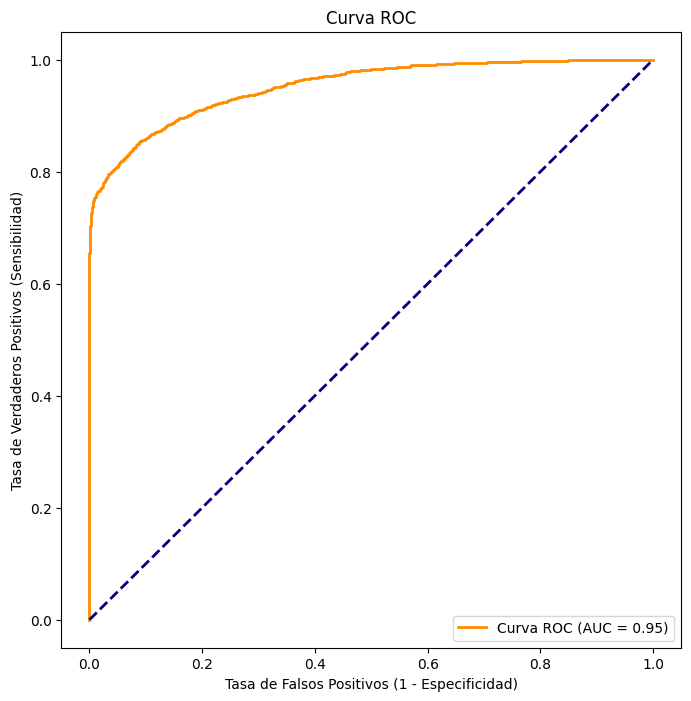

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcula las probabilidades de predicción para la clase positiva
y_probs = xgb_classifier.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()